In [1]:
import re
import time
import pickle
import os
import numpy as np
import pandas as pd
from itertools import *
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool
from textwrap import dedent
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.feature_selection import VarianceThreshold
import datetime
import math
# from plotnine import *
from sklearn.metrics import brier_score_loss
from sklearn.utils import column_or_1d

In [2]:
df = pd.read_csv('../data/ca_cd_49_l2_2016_09_29_featureset_1336.csv', error_bad_lines=False)

In [3]:
df.columns.tolist()

['Unnamed: 0',
 'ispsa',
 'dwelling_type_single_family_dwelling_unit',
 'dwelling_type_multi_family_dwelling',
 'dwelling_type_null',
 'dwelling_unit_size_1_single_family_dwelling',
 'dwelling_unit_size_101',
 'dwelling_unit_size_50_100',
 'dwelling_unit_size_2_duplex',
 'dwelling_unit_size_20_49',
 'dwelling_unit_size_10_19',
 'dwelling_unit_size_3_triplex',
 'dwelling_unit_size_5_9',
 'dwelling_unit_size_4',
 'dwelling_unit_size_null',
 'estimated_income_amount',
 'hh_upscale_buyer',
 'hh_upscale_male_buyer',
 'hh_upscale_female_buyer',
 'hh_book_buyer',
 'hh_family_magazine',
 'hh_female_oriented_magazine',
 'hh_religious_magazine',
 'hh_gardening_magazine',
 'hh_culinary_interest_magazine',
 'hh_health_fitness_magazine',
 'hh_do_it_yourselfer_magazine',
 'hh_financial_magazine',
 'hh_religious_contributor',
 'hh_political_contributer',
 'hh_donates_environment_cause_u',
 'hh_donates_environment_cause_y',
 'hh_donates_environment_cause_null',
 'hh_donates_to_charity_y',
 'hh_donates

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325813 entries, 0 to 325812
Columns: 537 entries, Unnamed: 0 to lalvoterid
dtypes: float64(535), int64(1), object(1)
memory usage: 1.3+ GB


In [5]:
df.shape

(325813, 537)

In [6]:
df.groupby('home_purchase_price')['land_value'].mean()

home_purchase_price
0.0          1.633234e+05
20000.0      6.502632e+04
21000.0      5.569091e+04
22000.0      2.720930e+04
23000.0      4.838298e+04
24000.0      4.910714e+04
25000.0      7.414118e+04
26000.0      5.978378e+04
27000.0      4.198592e+04
28000.0      4.416883e+04
29000.0      2.715000e+04
30000.0      5.090361e+04
31000.0      1.095161e+05
32000.0      6.927692e+04
33000.0      2.880769e+04
34000.0      3.905970e+04
35000.0      5.383333e+04
36000.0      6.359016e+04
37000.0      4.301724e+04
38000.0      4.198333e+04
39000.0      8.581579e+04
40000.0      6.801064e+04
41000.0      5.250943e+04
42000.0      6.186667e+04
43000.0      3.559091e+04
44000.0      4.892063e+04
45000.0      6.288060e+04
46000.0      6.476000e+04
47000.0      5.168966e+04
48000.0      4.980392e+04
                 ...     
5190000.0    0.000000e+00
5200000.0    0.000000e+00
5250000.0    0.000000e+00
5350000.0    2.521000e+06
5430000.0    3.510000e+05
5500000.0    1.687000e+06
5520000.0    2.300

In [7]:
df.isnull().sum().tolist()

[0,
 12826,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10137,
 157506,
 157506,
 157506,
 157506,
 157506,
 157506,
 157506,
 157506,
 157506,
 157506,
 157506,
 157506,
 152987,
 133386,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 157506,
 201295,
 157506,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10096,
 12826,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 12826,
 12826,
 12826,
 12826,
 12826,
 12826,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,

In [8]:
print(df.describe())

          Unnamed: 0          ispsa  \
count  325813.000000  312987.000000   
mean   162906.000000       6.070019   
std     94054.255965       2.455549   
min         0.000000       0.000000   
25%     81453.000000       4.000000   
50%    162906.000000       7.000000   
75%    244359.000000       8.000000   
max    325812.000000       9.000000   

       dwelling_type_single_family_dwelling_unit  \
count                              325813.000000   
mean                                    0.547053   
std                                     0.497782   
min                                     0.000000   
25%                                     0.000000   
50%                                     1.000000   
75%                                     1.000000   
max                                     1.000000   

       dwelling_type_multi_family_dwelling  dwelling_type_null  \
count                        325813.000000       325813.000000   
mean                              0.219948     

(array([19054., 16553., 15559., 16982., 17758., 20309., 17772., 23676.,
        27357., 27105., 25613., 22503., 18669., 10714., 10309.,  7983.,
         6354.,  4118.,  2206.,   625.]),
 array([18.  , 21.85, 25.7 , 29.55, 33.4 , 37.25, 41.1 , 44.95, 48.8 ,
        52.65, 56.5 , 60.35, 64.2 , 68.05, 71.9 , 75.75, 79.6 , 83.45,
        87.3 , 91.15, 95.  ]),
 <a list of 20 Patch objects>)

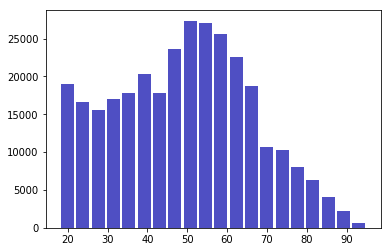

In [9]:
plt.hist(x=df['age'].dropna(), bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

(array([ 9962.,  4629.,  4463.,  4576.,  4151.,  3978.,  3848.,  3843.,
         3851.,  3949.,  7959.,  4235.,  4357.,  4347.,  4278.,  4530.,
         4383.,  4567.,  4829.,  4746., 10734.,  6114.,  5970.,  5688.,
         5620.,  5644.,  6042.,  6370.,  6741.,  6755., 13861.,  6748.,
         6773.,  6857.,  6727.,  6450.,  6563.,  6447.,  6153.,  5798.,
        11213.,  5492.,  5710.,  5050.,  4100.,  3809.,  4000.,  3614.,
         3100.,  2876.,  5206.,  2227.,  2148.,  2081.,  1924.,  1830.,
         1701.,  1640.,  1587.,  1426.,  2351.,   915.,   852.,   754.,
          600.,   436.,   416.,   243.,   173.,   209.]),
 array([18. , 19.1, 20.2, 21.3, 22.4, 23.5, 24.6, 25.7, 26.8, 27.9, 29. ,
        30.1, 31.2, 32.3, 33.4, 34.5, 35.6, 36.7, 37.8, 38.9, 40. , 41.1,
        42.2, 43.3, 44.4, 45.5, 46.6, 47.7, 48.8, 49.9, 51. , 52.1, 53.2,
        54.3, 55.4, 56.5, 57.6, 58.7, 59.8, 60.9, 62. , 63.1, 64.2, 65.3,
        66.4, 67.5, 68.6, 69.7, 70.8, 71.9, 73. , 74.1, 75.2, 76.3, 77

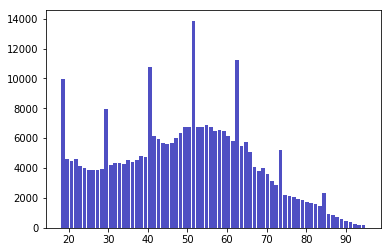

In [10]:
plt.hist(x=df['age'].dropna(), bins=70, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

(array([26631., 54672., 73055., 63939., 47468., 20938.,  4643., 24330.]),
 array([  6000.,  36500.,  67000.,  97500., 128000., 158500., 189000.,
        219500., 250000.]),
 <a list of 8 Patch objects>)

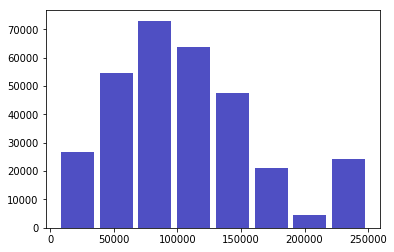

In [11]:
plt.hist(x=df['estimated_income_amount'].dropna(), bins=8, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

(array([249899.,  75914.]),
 array([0. , 0.5, 1. ]),
 <a list of 2 Patch objects>)

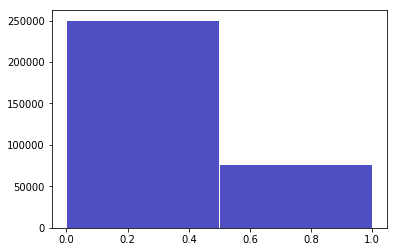

In [12]:
plt.hist(x=df['dwelling_type_null'].dropna(), bins=2, color='#0504aa',
                            alpha=0.7, rwidth=0.99)

(array([168307., 157506.]),
 array([0. , 0.5, 1. ]),
 <a list of 2 Patch objects>)

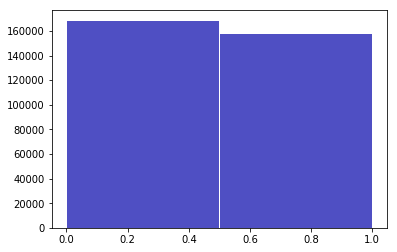

In [13]:
plt.hist(x=df['hh_computer_owner_null'].dropna(), bins=2, color='#0504aa',
                            alpha=0.7, rwidth=0.99)

/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


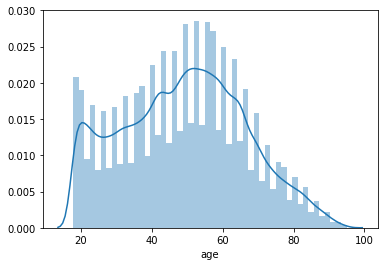

In [14]:
sns.distplot(df['age'].dropna())

In [15]:
print(df['cd_49'].describe())

count    325813.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: cd_49, dtype: float64


In [16]:
import statsmodels.api as sm
model = sm.formula.glm("voted_18g ~ home_purchase_price + age + land_value + estimated_home_value + estimated_median_income",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())
#Why is home_purchase_price barely signicant here?

                 Generalized Linear Model Regression Results                  
Dep. Variable:              voted_18g   No. Observations:               162402
Model:                            GLM   Df Residuals:                   162396
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -42360.
Date:                Tue, 05 Mar 2019   Deviance:                       84720.
Time:                        11:59:17   Pearson chi2:                 1.38e+05
No. Iterations:                     6   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -6.5331      0.054   -121.807      0.000      -6.638      -6.428
home_purchase

In [17]:
import statsmodels.api as sm
model = sm.formula.glm("voted_18g~hh_upscale_buyer+hh_upscale_male_buyer+hh_upscale_female_buyer+hh_book_buyer+hh_family_magazine+hh_female_oriented_magazine+hh_religious_magazine+hh_gardening_magazine+hh_culinary_interest_magazine+hh_health_fitness_magazine+hh_do_it_yourselfer_magazine+hh_financial_magazine+hh_religious_contributor+hh_political_contributer+hh_donates_environment_cause_u+hh_donates_environment_cause_y+hh_donates_environment_cause_null+hh_donates_to_charity_y+hh_donates_to_charity_u+hh_donates_to_charity_null+hh_presence_of_prem_cred_crd_u+hh_presence_of_prem_cred_crd_y+hh_presence_of_prem_cred_crd_null+hh_computer_owner_y+hh_computer_owner_u+hh_computer_owner_null",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              voted_18g   No. Observations:               165085
Model:                            GLM   Df Residuals:                   165066
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45782.
Date:                Tue, 05 Mar 2019   Deviance:                       91563.
Time:                        11:59:29   Pearson chi2:                 1.62e+05
No. Iterations:                   100   Covariance Type:             nonrobust
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                         -1.373e+10   6.57e+11     -0.021      0.983    -1.3

/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [18]:
model = sm.formula.glm("voted_18g~hh_upscale_buyer+hh_upscale_male_buyer+hh_family_magazine+hh_female_oriented_magazine+hh_gardening_magazine+hh_health_fitness_magazine+hh_financial_magazine+hh_political_contributer+hh_presence_of_prem_cred_crd_null+hh_computer_owner_null",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              voted_18g   No. Observations:               165085
Model:                            GLM   Df Residuals:                   165076
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -46211.
Date:                Tue, 05 Mar 2019   Deviance:                       92421.
Time:                        11:59:30   Pearson chi2:                 1.61e+05
No. Iterations:                     6   Covariance Type:             nonrobust
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -2.6776      0.012   -228.233      0.000      -2

In [19]:
model = sm.formula.glm("voted_18g~ethnicity_european+ethnicity_likely_african_american+ethnicity_hispanic_and_portuguese+ethnicity_other+ethnicity_east_and_south_asian+ethnicity_null",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              voted_18g   No. Observations:               311219
Model:                            GLM   Df Residuals:                   311213
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -78820.
Date:                Tue, 05 Mar 2019   Deviance:                   1.5764e+05
Time:                        11:59:35   Pearson chi2:                 3.16e+05
No. Iterations:                   100   Covariance Type:             nonrobust
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          1.388e+10   2.12e+11      0.065      0.948   -4.02

In [20]:
model = sm.formula.glm("voted_18g~religion_protestant+religion_catholic+religion_jewish+religion_christian+religion_eastern_orthodox+religion_buddhist+religion_islamic+religion_hindu+religion_greek_orthodox+religion_shinto+religion_lutheran+religion_mormon+religion_sikh+religion_null",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              voted_18g   No. Observations:               311219
Model:                            GLM   Df Residuals:                   311205
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -78455.
Date:                Tue, 05 Mar 2019   Deviance:                   1.5691e+05
Time:                        11:59:48   Pearson chi2:                 3.03e+05
No. Iterations:                   100   Covariance Type:             nonrobust
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  2.053e+10   1.12e+11      0.184      0.854   -1.98e+11     2.4e+11
religio

In [21]:
model = sm.formula.glm("voted_18g~occupation_industry_other+occupation_industry_medical+occupation_industry_management+occupation_industry_clericaloffice+occupation_industry_manufacturing+occupation_industry_financial_services+occupation_industry_skilled_trades+occupation_industry_education+occupation_industry_military+occupation_industry_computer_professional+occupation_industry_legal+occupation_industry_engineering+occupation_industry_civil_servant+occupation_industry_food_services+occupation_industry_other_other+occupation_industry_null",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              voted_18g   No. Observations:               311219
Model:                            GLM   Df Residuals:                   311202
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -78715.
Date:                Tue, 05 Mar 2019   Deviance:                   1.5743e+05
Time:                        11:59:50   Pearson chi2:                 3.11e+05
No. Iterations:                     6   Covariance Type:             nonrobust
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -2.1615      0.242     -